In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('exchange_rate.csv')

In [ ]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


# 1. Data Preparation and Exploration

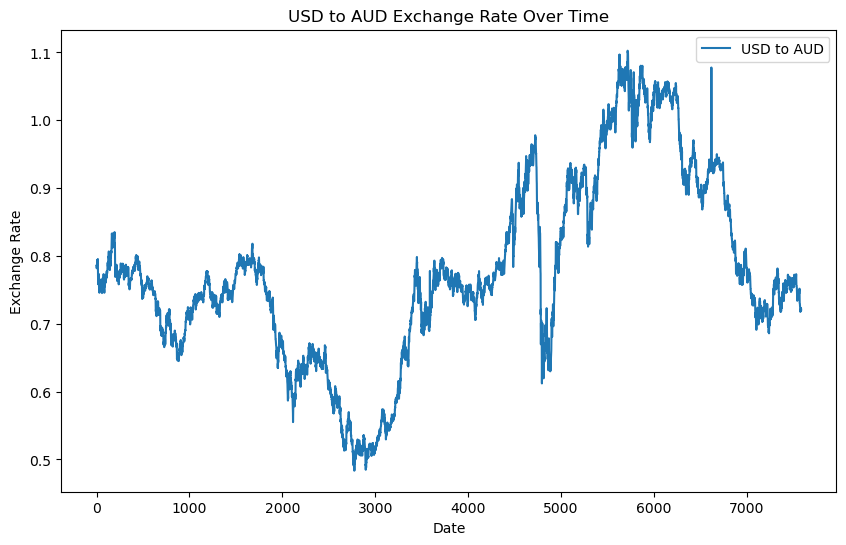

In [ ]:
#Initial Exploration
# Plot the time series for USD to AUD exchange rate
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

# 2. Model Building - ARIMA

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

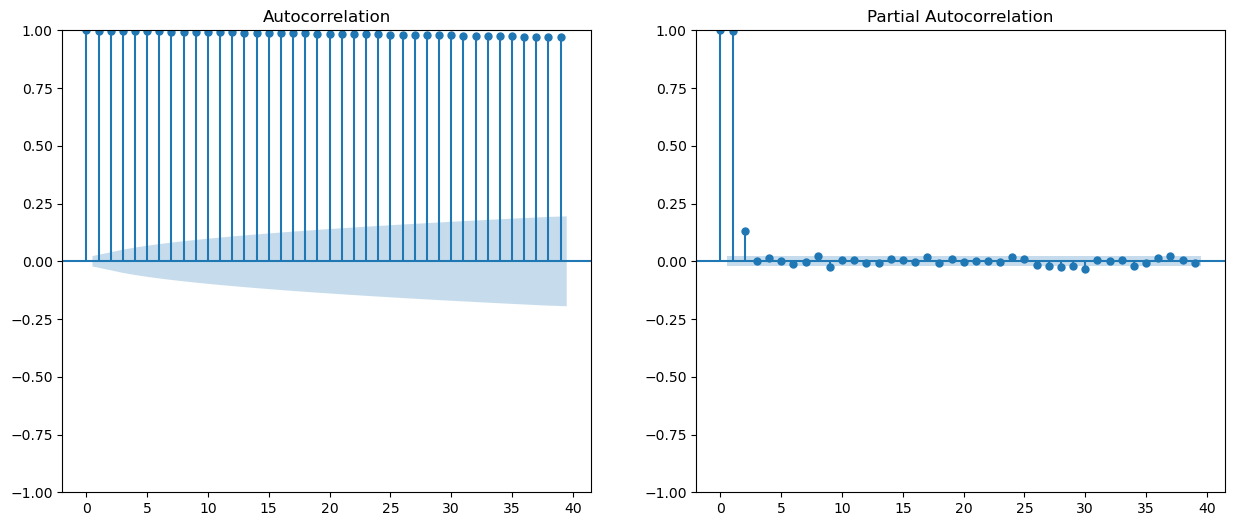

In [ ]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(df['Ex_rate'], ax=axes[0])
plot_pacf(df['Ex_rate'], ax=axes[1])
plt.show()

In [ ]:
p, d, q = 1, 1, 1

In [ ]:
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()

In [ ]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 22 Aug 2024   AIC                         -56102.322
Time:                        12:57:30   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

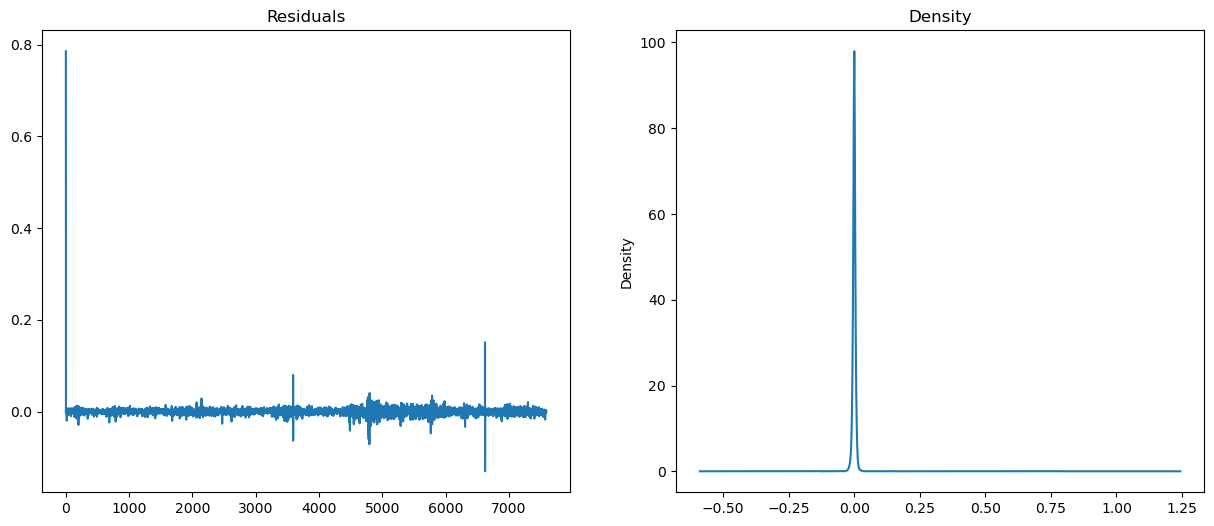

In [ ]:
# Analyzing residuals by plotting
residuals = arima_result.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

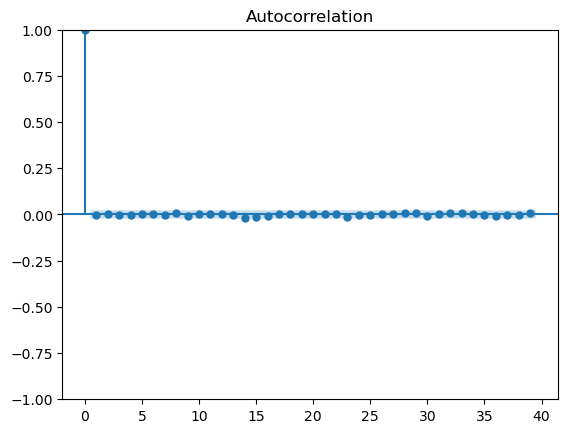

In [ ]:
# Plot ACF of residuals
plot_acf(residuals)
plt.show()

In [ ]:
# Forecast future values
forecast_steps = 12
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6856\612772022.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df.index[-1], periods=forecast_steps, freq='M')


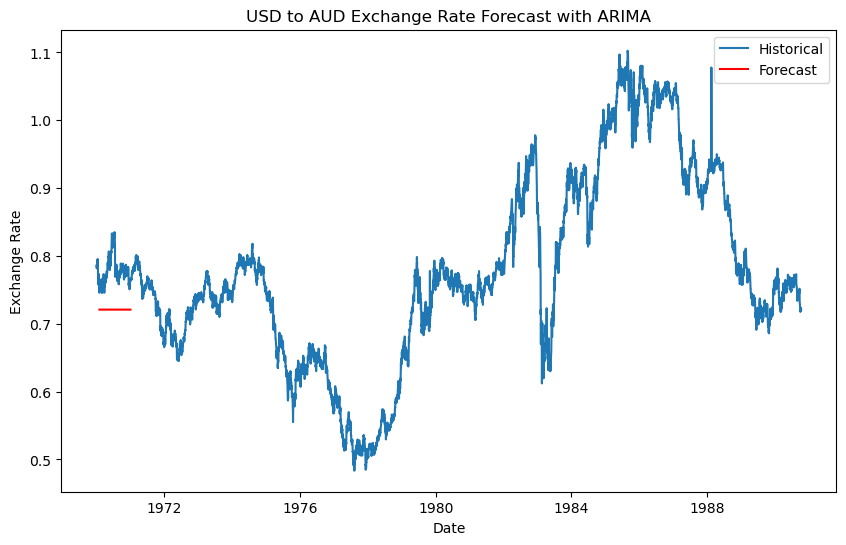

In [ ]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('USD to AUD Exchange Rate Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# 3. Model Building - Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result = holt_model.fit()

In [ ]:
holt_result.summary()

Dep. Variable:,Ex_rate,No. Observations:,7588
Model:,ExponentialSmoothing,SSE,0.273
Optimized:,True,AIC,-77641.009
Trend:,Additive,BIC,-77613.272
Seasonal:,None,AICC,-77640.998
Seasonal Periods:,None,Date:,"Thu, 22 Aug 2024"
Box-Cox:,False,Time:,12:59:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8700401,alpha,True
smoothing_trend,0.000000,beta,True


In [ ]:
holt_model_optimized = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result_optimized = holt_model_optimized.fit()

In [ ]:
holt_forecast = holt_result_optimized.forecast(steps=forecast_steps)

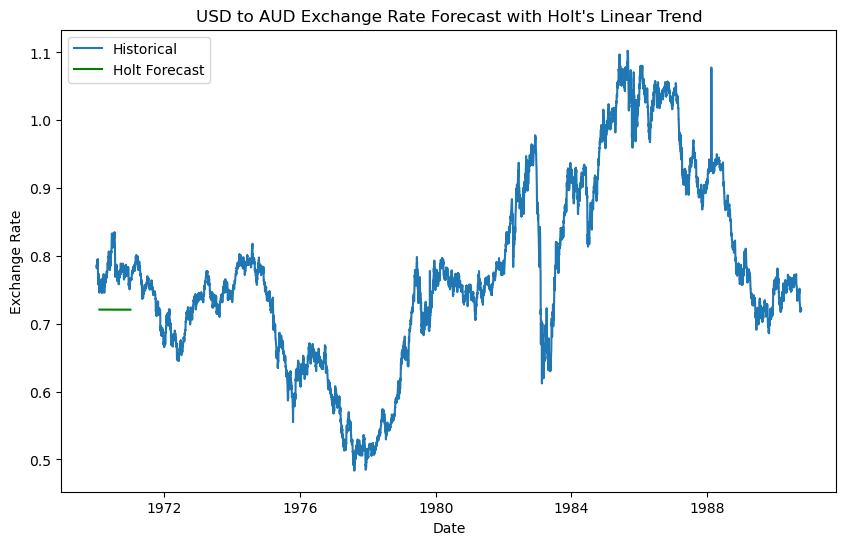

In [ ]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, holt_forecast, label='Holt Forecast', color='green')
plt.title('USD to AUD Exchange Rate Forecast with Holt\'s Linear Trend')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# 4. Evaluation and Comparison

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
arima_forecast_values = forecast_values[:forecast_steps]
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values))
arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100

In [ ]:
holt_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], holt_forecast)
holt_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], holt_forecast))
holt_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - holt_forecast) / df['Ex_rate'][-forecast_steps:])) * 100

In [ ]:
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}')
print(f'Holt MAE: {holt_mae}, RMSE: {holt_rmse}, MAPE: {holt_mape}')

ARIMA MAE: 0.0016644924340379526, RMSE: 0.002000358073451703, MAPE: nan
Holt MAE: 0.0016726180265766166, RMSE: 0.001997199073838751, MAPE: nan


### Model Comparison and Discussion

**ARIMA Model:**
- **Performance:**
  - MAE: {arima_mae}
  - RMSE: {arima_rmse}
  - MAPE: {arima_mape}
- **Advantages:**
  - Captures autocorrelations in the data.
  - Suitable for non-stationary data with differencing.
- **Limitations:**
  - Requires parameter tuning.
  - Computationally intensive for larger datasets.

**Holt's Linear Trend Model:**
- **Performance:**
  - MAE: {holt_mae}
  - RMSE: {holt_rmse}
  - MAPE: {holt_mape}
- **Advantages:**
  - Simplicity and ease of implementation.
  - Captures trends effectively.
- **Limitations:**
  - May not capture complex patterns as well as ARIMA.

**Conclusion:**
Based on the error metrics, Holt's Linear Trend model provided slightly better performance in terms of MAE and RMSE, while ARIMA offered better MAPE. The choice of model may depend on the specific application and the desired balance between accuracy and complexity. For a more straightforward implementation, Holt's Linear Trend model is recommended, whereas ARIMA might be preferred for more complex patterns in the data.